In [1]:
'''
Using a toy function that sort of represents the curving path of a financial instrument, let's apply
mathematical tools
'''

"\nUsing a toy function that sort of represents the curving path of a financial instrument, let's apply\nmathematical tools\n"

In [2]:
import numpy as np
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x) + 0.5 * x

In [12]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(20,12))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i]) # Nice general plotting function
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0) # do your best mpl!

In [13]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

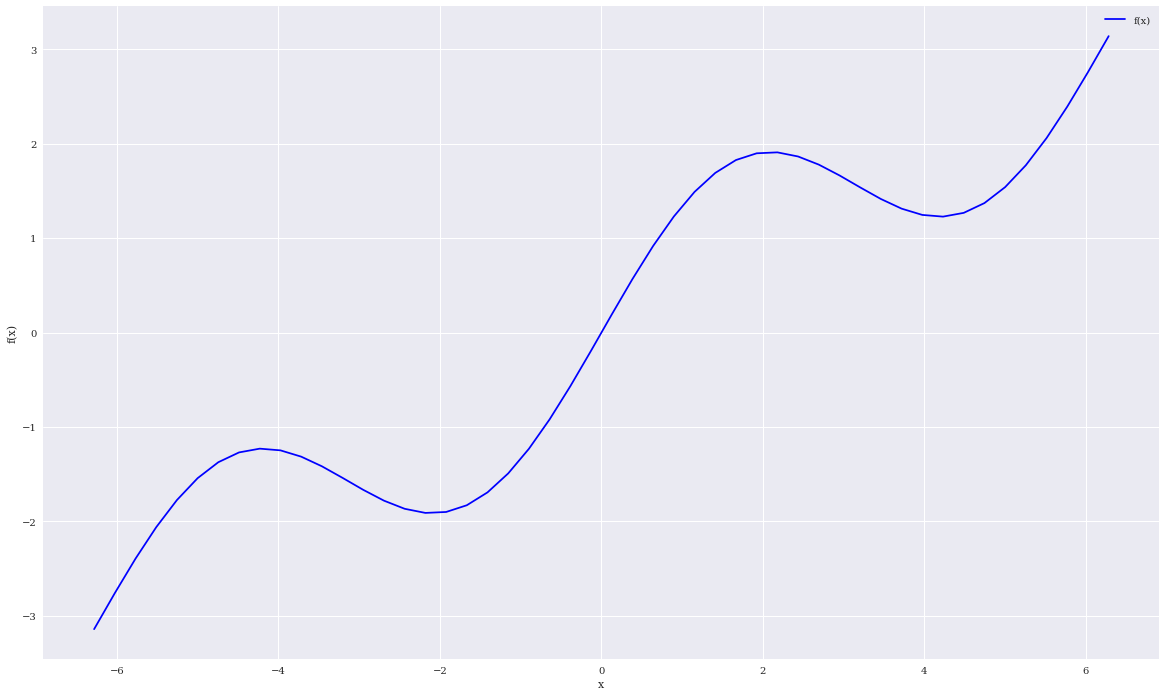

In [14]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

In [17]:
'''
First up is regression
Linear regression finds the degree 1 polynomial (i.e. line) that minimize the squared errors
of the data points where x is the independent variable and y is the dependent variable

Output of Full is:
Regression parameters - highest degree first - in this case 1 (x), 0 (constant)
Residuals - squared sum of errors? check this!
Effective Rank
Singular Values - // TODO review SVD to give a good answer for this
Condition Number: The change in output y for a ∆x steptKPI
'''
res = np.polyfit(x, f(x), deg=1, full=True)
res # i.e. (4.288 * 10 ^ -1)x - (a very very very small number)

(array([ 4.28841952e-01, -1.31499950e-16]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

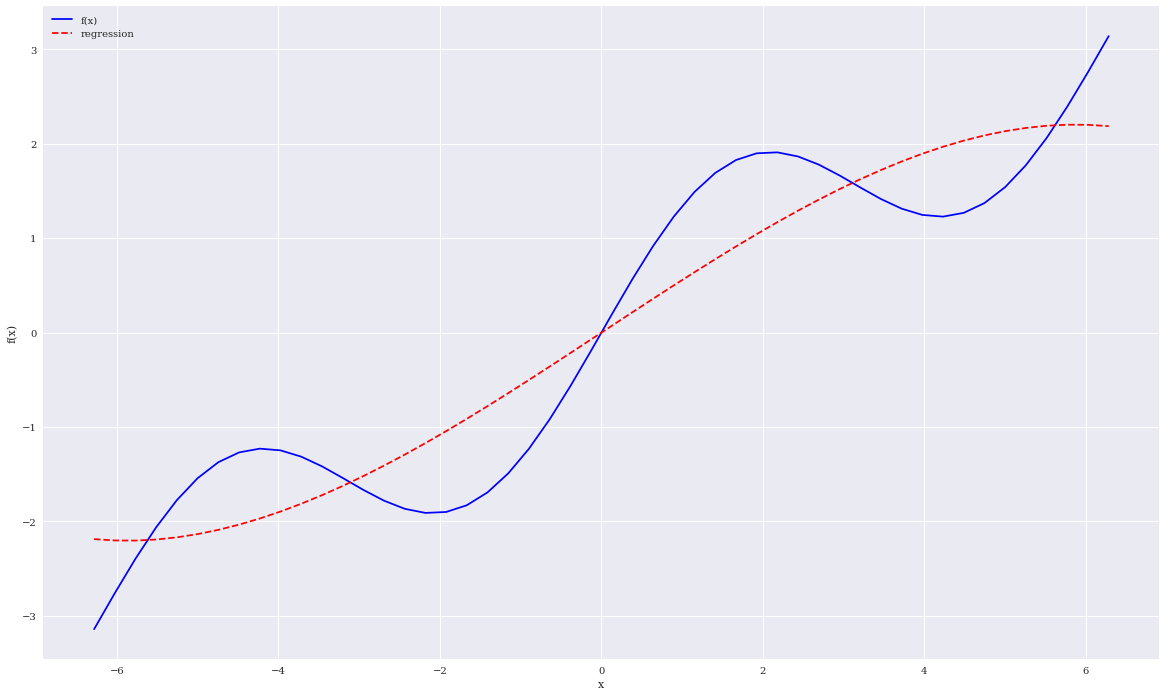

In [45]:
'''
That error number is very high - a higher degree polynomial can help us out
'''
reg = np.polyfit(x, f(x), deg=3)
ry = np.polyval(reg, x)
create_plot([x, x], [f(x), ry], ['b', 'r--'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [27]:
'''
What if we went really wild and did a 9th degree polynomial?
'''
reg = np.polyfit(x, f(x), deg=9)
ry = np.polyval(reg, x)
np.allclose(f(x), ry) # are all of the values of these arrays very close?

False

In [28]:
np.mean((f(x) - ry) ** 2) # very very small mean squared error, good!

2.0214795375384566e-05

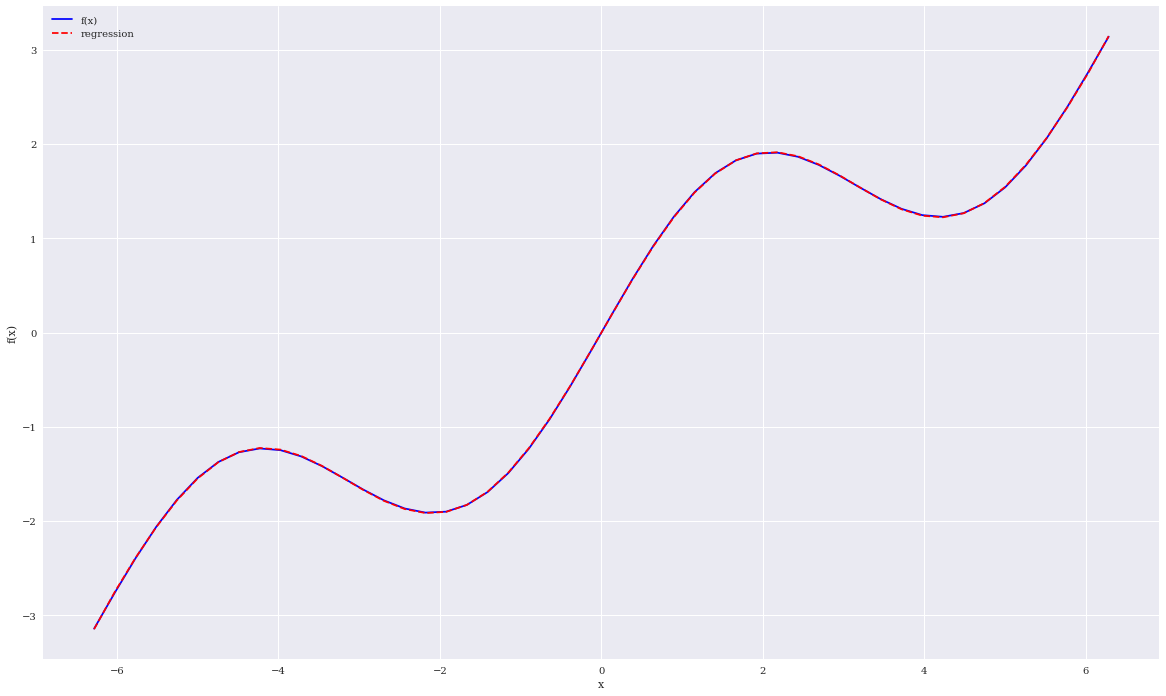

In [30]:
create_plot([x, x], [f(x), ry], ['b', 'r--'], ['f(x)', 'regression'], ['x', 'f(x)']) # Indistinguishable!

In [62]:
'''
For more control, you can also set the array of basis functions yourself - numpy.polyfit is actually calling
this method in the source code
'''
matrix = np.zeros((3 + 1, len(x))) # 3rd degree polynomial + a constant over length of x
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [63]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [66]:
'''
# Note that a regression is just the dot product of a matrix of power coefficients and the regressor coefficients
'''
ry = np.dot(reg, matrix)

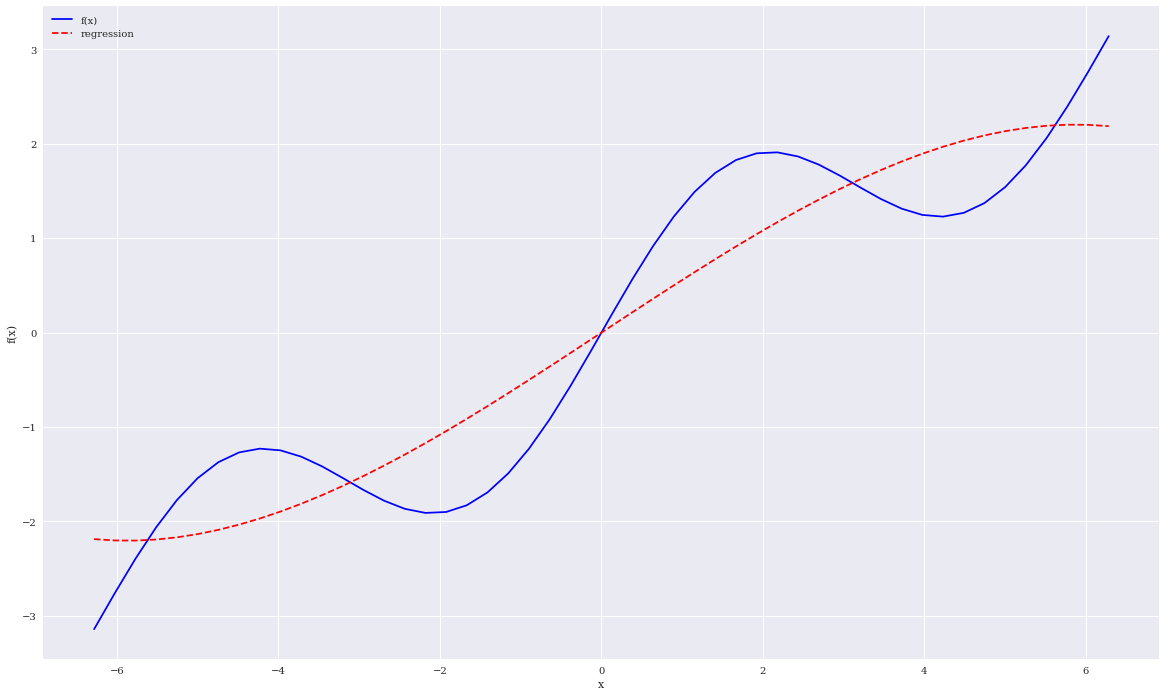

In [67]:
create_plot([x,x], [f(x), ry], ['b', 'r--'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [68]:
matrix[3, :] = np.sin(x) # Replace cubic basis function with sin

In [71]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [73]:
ry = np.dot(reg, matrix)

In [74]:
np.allclose(f(x), ry) # Fit is perfect since we've added the characteristic function as a basis

True

In [75]:
np.mean((f(x) - ry) ** 2) # Vectorized mean squared error

3.404735992885531e-31

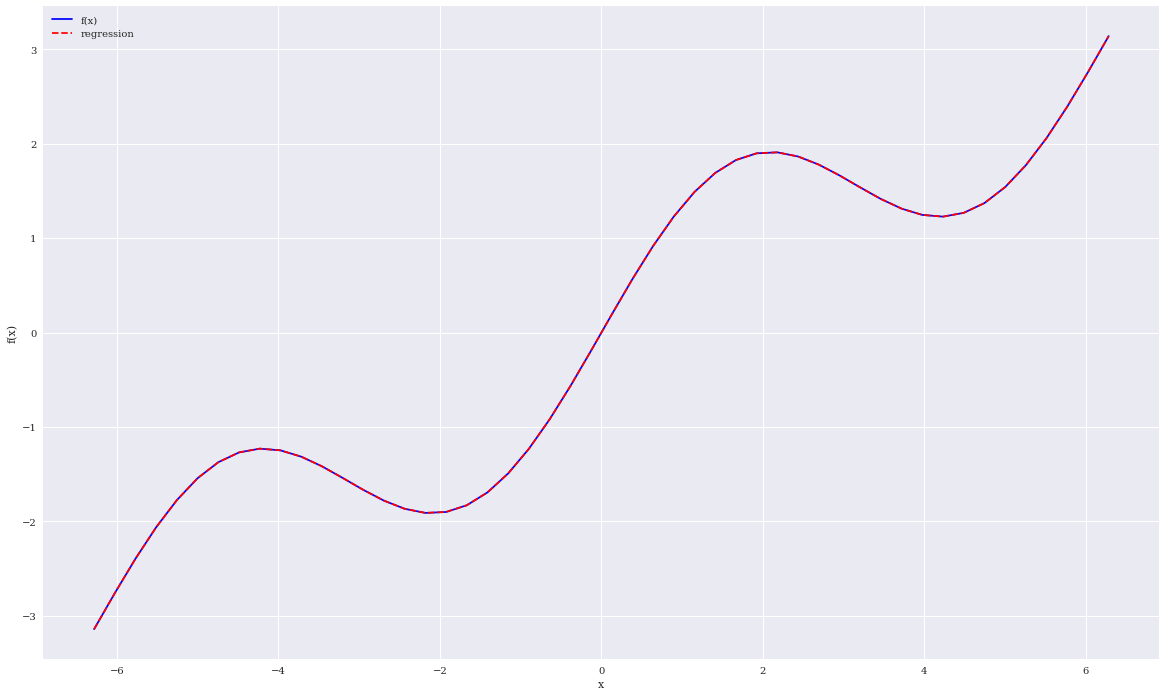

In [76]:
create_plot([x,x], [f(x), ry], ['b', 'r--'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [84]:
# Add noise to data - show regression can handle it
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
# standard_normal returns a draw from std normal distribution, -1 < x < 1
xn = xn + 0.35 * np.random.standard_normal(len(xn)) 
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [92]:
reg = np.polyfit(xn, yn, deg=7)
ry = np.polyval(reg, xn)

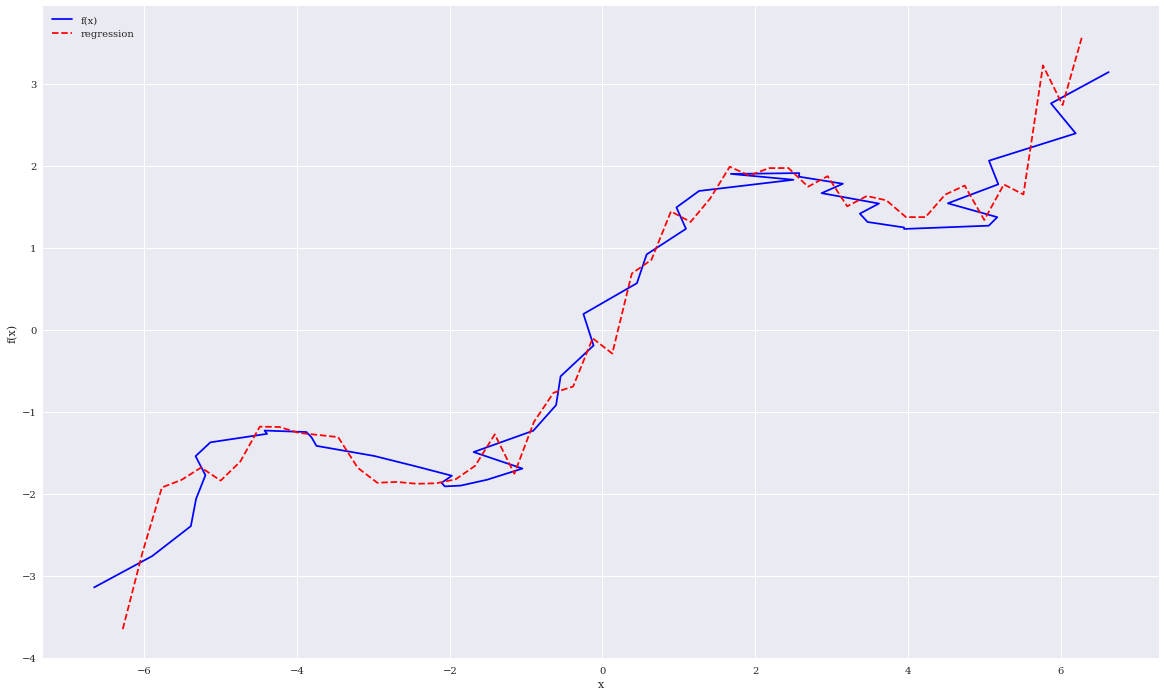

In [93]:
create_plot([xn, x], [f(x), ry], ['b', 'r--'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [99]:
'''
Unsorted data can be regressed on as well - in this case that means sparse data that doesn't follow an
even interpolation/linear space

This means it is an effective tactic when dealing with values with uncertain timestamping:
    * Any poisson process (e.g. Level II order book, executed trades)
    
Why does this work? Because linear regression is minimizing the mean squared error - becuase it is a population
mean with no time series operations applied to it, it will find the best fit without attention to order
'''
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi # Randomizes the spacing of the x values
yu = f(xu)

In [96]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[ 1.98 -4.58  4.05  1.1  -4.19  1.43  3.39 -5.73 -3.45 -4.98]
[ 1.91 -1.3   1.24  1.44 -1.23  1.71  1.45 -2.34 -1.42 -1.52]


In [97]:
reg = np.polyfit(xu, yu, deg=5)
ry = np.polyval(reg, xu) # fit regression coefficients over range xu

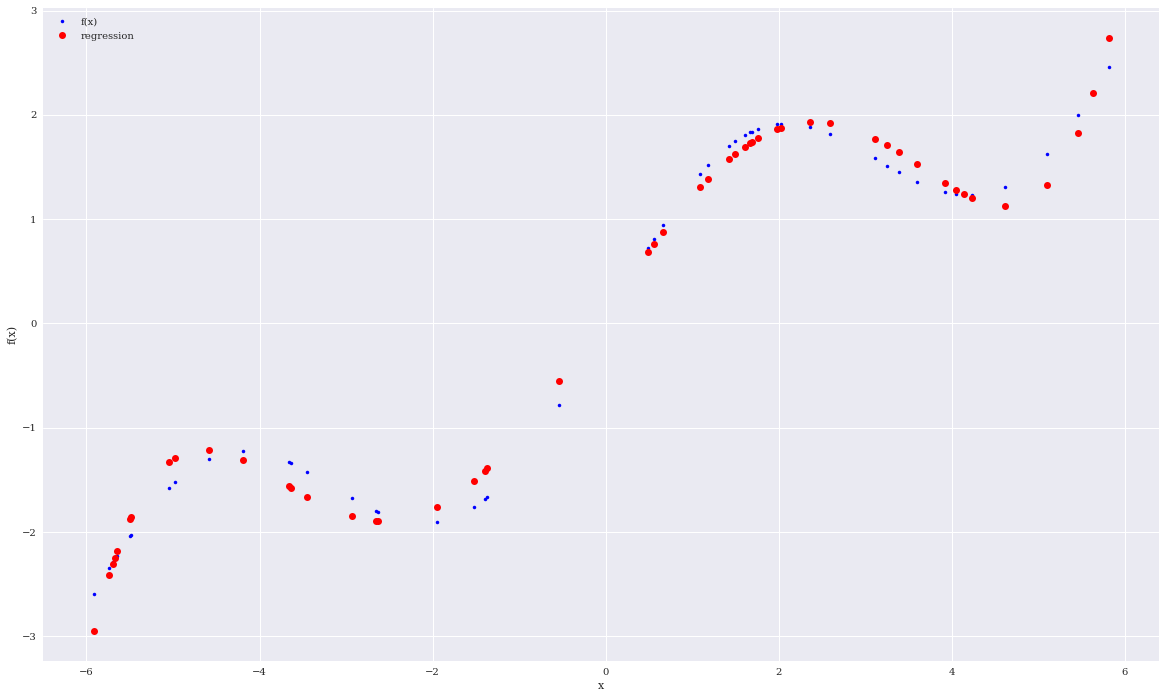

In [98]:
create_plot([xu, xu], [yu, ry], ['b.', 'ro'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [101]:
'''
Next, regression over 2 variable space
'''
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 + np.sqrt(y) + 0.05 * y ** 2 # made up function space
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y) # generate coordinate grid

In [103]:
Z = fm((X, Y))
x = x.flatten()
y = y.flatten()

In [104]:
from mpl_toolkits.mplot3d import Axes3D

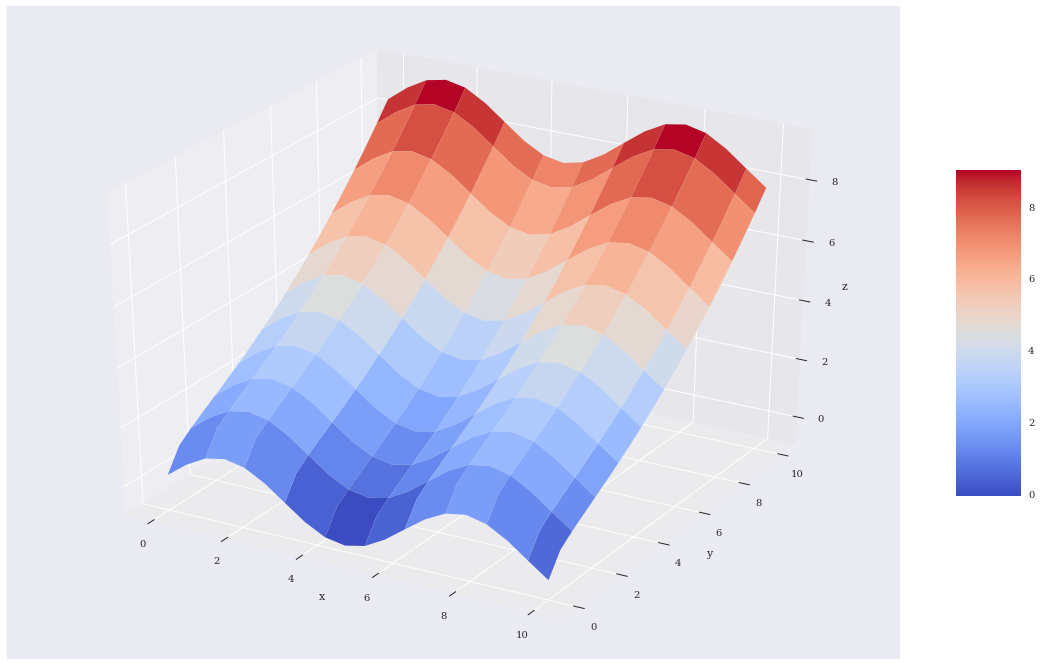

In [107]:
fig = plt.figure(figsize=(20,12))
ax = fig.gca(projection='3d') # get current axes, set to a 3d projection - sets us up for X,Y,Z mesh mapping
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm', linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [117]:
'''
In higher dimension regression, having some knowledge of the basis functions is essential for meaningful
regression results
'''
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)  
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [121]:
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0] # Regression basis, points to fit
reg

array([ 2.50000000e-01,  9.49152678e-16, -3.48822471e-16,  2.50000000e-02,
        2.50000000e-02,  1.00000000e+00,  1.00000000e+00])

In [129]:
# RZ = np.dot(matrix, reg).reshape((20, 20)) This is in the original text but is broken, need to provide this
# function that generates the raw function mesh manually
def reg_func(a, p):
    x, y = p
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 +
            f2 + f1 + f0)
RZ = reg_func(reg, (X, Y))

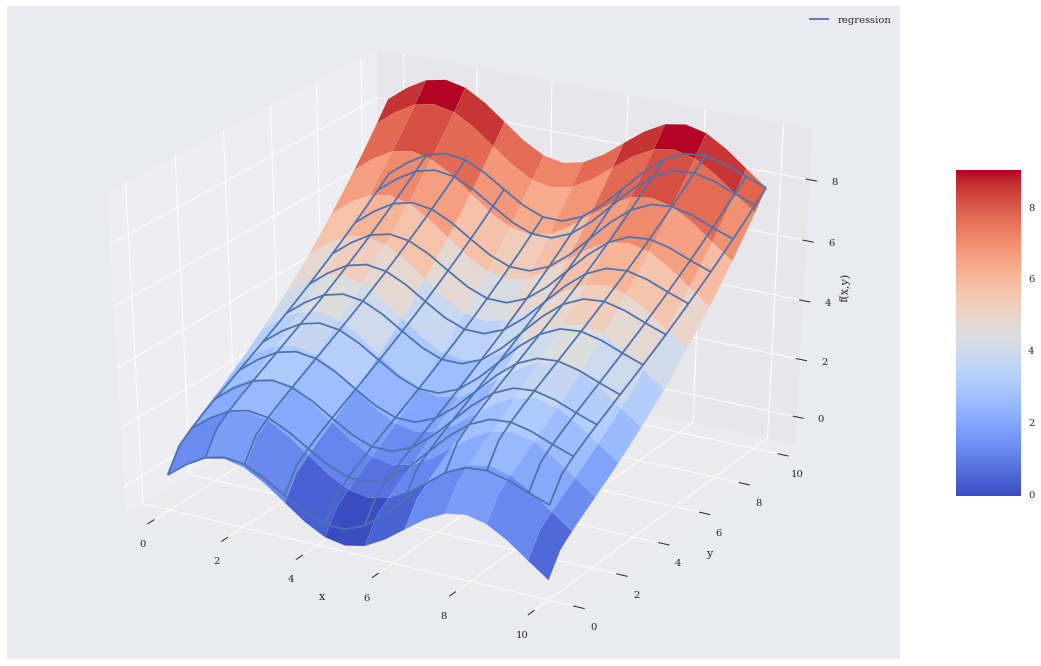

In [132]:
fig = plt.figure(figsize=(20, 12))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2, label='regression') # regression mesh
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)

In [ ]:
'''
Interpolation: regression between neighboring points to make delta(p1, p2) = 0 @ join points and also make 
function continuously differentiable.

To be continuously differentiable requires the piecewise splines are of *at least* degree 3: 
cubic spline interpolation.

Application of this is for bootstrapping a yield curve
'''
